# IN3061/INM430 - Coursework: A Tiny Data Science Project


***

Student Name: Dimitrios Megkos - 210034034

Project Title: An Aquaculture Study: Analysing the Pre-Fattening Period of Two Fish Species

***




#### Importing libraries

In [1]:
#imports
#general
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for linear regression model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Reading the file

In [2]:
#read excel file
hatchery = pd.read_excel("GMF Hatchery.xlsx")

#check dataset head
hatchery.head()

,Species,Tank Group,Tank Name,Part Number,Production Stage,Calculated,Date,Fish_no,Fish age,Days in tank,...,Estimation fix_no,Estimation fix_kg,Estimation fix_percentage,Fish add_no,Fish add_kg,Fish remove_no,Fish remove_kg,Fish sold_no,Fish sold_kg,Random sampling_gr
0,European bass,NaN,POOL,L11019G.GL1.01,Pre-fattening,True,2020-01-15,714000,87,0,...,0,0.0,0.0,714000,222.68,0,0.0,0,0.0,NaN
1,European bass,NaN,POOL,L11019G.GL1.01,Pre-fattening,True,2020-01-16,705000,88,1,...,0,0.0,0.0,0,0.00,0,0.0,0,0.0,NaN
2,European bass,NaN,POOL,L11019G.GL1.01,Pre-fattening,True,2020-01-17,703286,89,2,...,0,0.0,0.0,0,0.00,0,0.0,0,0.0,NaN
3,European bass,NaN,POOL,L11019G.GL1.01,Pre-fattening,True,2020-01-18,701856,90,3,...,0,0.0,0.0,0,0.00,0,0.0,0,0.0,NaN
4,European bass,NaN,POOL,L11019G.GL1.01,Pre-fattening,True,2020-01-19,700856,91,4,...,0,0.0,0.0,0,0.00,0,0.0,0,0.0,NaN


The dataset describes the pre-fattening production stage of a marine farm, for two different fish species. The data ranges from February 2019 to December 2020. From the moment the fish hatch from the eggs, they are put together in groups which can be identified by unique part numbers. Each group is then split into several tanks where they stay until they reach a certain growth point before they are moved to the next production stage.

In [3]:
#check dataset descriptive statistics
hatchery.describe()

,Fish_no,Fish age,Days in tank,Estimated number,Estimated Production,Age Category,Weight Category,Fish_no_per_m3,Fish_kg_per_m3,Daily SFR,...,Estimation fix_no,Estimation fix_kg,Estimation fix_percentage,Fish add_no,Fish add_kg,Fish remove_no,Fish remove_kg,Fish sold_no,Fish sold_kg,Random sampling_gr
count,24276.000000,24276.000000,24276.000000,24276.000000,24276.000000,0.0,0.0,24276.000000,24276.000000,23434.000000,...,24276.000000,24276.000000,24276.000000,24276.000000,24276.000000,24276.000000,24276.000000,24276.000000,24276.000000,2272.000000
mean,164428.024675,94.228003,11.595815,89384.388861,88364.680096,NaN,NaN,11282.701317,4.288171,12.487102,...,-429.380829,0.134511,0.198145,9906.300049,4.951420,7471.290699,4.935679,1043.237642,3.723210,1.353008
std,131737.537270,32.611562,10.425277,95236.939865,94881.458467,NaN,NaN,14712.222103,5.056606,18.712955,...,17456.343640,7.544757,9.648334,45952.345081,31.781546,35465.463312,32.703545,14273.129676,46.766231,1.368859
min,0.000000,13.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,-598537.000000,-209.364120,-83.554020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,96220.500000,70.000000,4.000000,0.000000,0.000000,NaN,NaN,3948.063937,0.681081,4.402490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332750
50%,132965.000000,92.000000,9.000000,91825.000000,91077.500000,NaN,NaN,6485.849057,2.276050,6.986156,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.843500
75%,195126.750000,117.000000,17.000000,141509.500000,140449.000000,NaN,NaN,11376.994075,6.128920,13.344509,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.971500
max,967000.000000,218.000000,76.000000,967000.000000,967000.000000,NaN,NaN,107526.881720,49.287606,443.147920,...,282712.000000,259.370103,632.349319,967000.000000,1410.350000,588346.000000,1410.350000,931508.000000,1769.180000,7.900000


In [4]:
#check for columns that have no information
hatchery.mean(numeric_only=True)==0

Calculated                   False
Fish_no                      False
Fish age                     False
Days in tank                 False
Estimated number             False
Estimated Production         False
Age Category                 False
Weight Category              False
Fish_no_per_m3               False
Fish_kg_per_m3               False
Daily SFR                    False
F_Food_kg                    False
F_Algae_lt                    True
F_Rotifer_mil                False
F_Artemia_mil                False
Fasting                      False
Input_no                      True
Input_kg                      True
Mortality_no                 False
Mortality_percentage         False
Disposal_no                  False
Deformity_no                 False
Bad_swim_bladder             False
Estimation fix_no            False
Estimation fix_kg            False
Estimation fix_percentage    False
Fish add_no                  False
Fish add_kg                  False
Fish remove_no      

In [5]:
#search for null values
hatchery.isnull().sum()

Species                          0
Tank Group                     164
Tank Name                        0
Part Number                      0
Production Stage                 0
Calculated                       0
Date                             0
Fish_no                          0
Fish age                         0
Days in tank                     0
Estimated number                 0
Estimated Production             0
Age Category                 24276
Weight Category              24276
Fish_no_per_m3                   0
Fish_kg_per_m3                   0
Daily SFR                      842
F_Food_kg                        0
F_Algae_lt                       0
F_Rotifer_mil                    0
F_Artemia_mil                    0
Fasting                          0
Input_no                         0
Input_kg                         0
Mortality_no                     0
Mortality_percentage             0
Disposal_no                      0
Deformity_no                     0
Bad_swim_bladder    

According to the results above, there are three numeric columns with mean value zero that add no information to the dataset, since the zero here is meaningful, and can be removed.

Age Category and Weight Category can also be deleted since all the values are null. Tank Group and Daily SFR can also be deleted since they won't be used for the analysis. 

Random sampling_gr represents the weight in grams of a sample fish chosen randomly from a tank on a certain day. It plays an important role to one part of the analysis, since it will be used to calculate the total batch biomass for each day. A null value means that there was no sampling for that day. Null values will be replaced with zero to indicate that.

In [6]:
#drop columns with mean value 0
hatchery = hatchery.drop(columns=['F_Algae_lt', 'Input_no', 'Input_kg'])
#drop Age Category, Weight Category because all values are missing, drop Tank Group and Daily SFR, won't be using
hatchery = hatchery.drop(columns=['Tank Group', 'Age Category', 'Weight Category', 'Daily SFR'])


#dropping columns I won't use for my analysis
hatchery = hatchery.drop(columns=['Production Stage', 'Calculated',
                                  'Days in tank', 'Estimated number', 'Estimated Production', 'Fasting', 'Mortality_percentage',                                  
                                  'Estimation fix_no', 'Estimation fix_kg', 'Estimation fix_percentage',
                                  'Fish add_no','Fish add_kg','Fish remove_no','Fish remove_kg',
                                  'Fish_no_per_m3', 'Fish_kg_per_m3','F_Rotifer_mil','F_Artemia_mil'])

#### Total Part Numbers per species

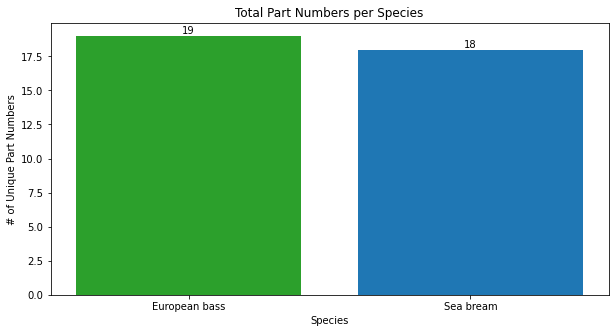

In [7]:
#Show for each species the total number of Part Numbers
#create dataset
sppnum = np.asarray(hatchery[['Species','Part Number']].groupby(['Species'], as_index=False).nunique())
#new figure
fig, ax = plt.subplots(figsize=(10,5))
#create bars with colors
ax.bar(sppnum[:,0],sppnum[:,1], color=['tab:green','tab:blue'])
# title and axis names
ax.set_title('Total Part Numbers per Species')
ax.set_xlabel('Species')
ax.set_ylabel('# of Unique Part Numbers')
#auto-label bars
ax.bar_label(ax.containers[0])
#show plot
plt.show()

The dataset contains a total of thirty-seven unique part numbers. The population of European bass is split into nineteen different part numbers, while the population of Sea bream is split into eighteen different part numbers.

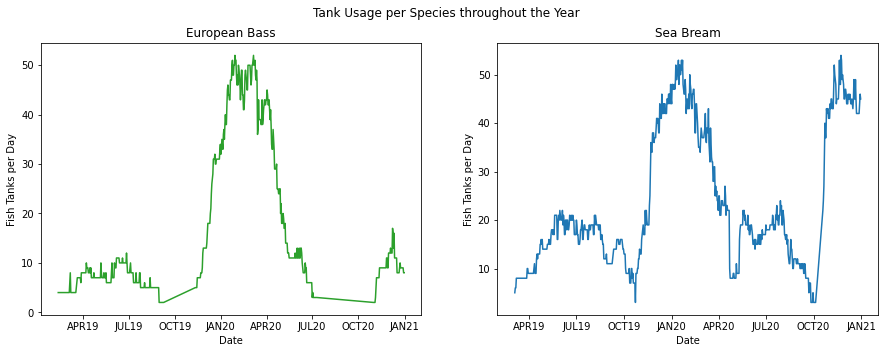

In [8]:
#show for each species the tank usage
#create dataset
tanks = hatchery[['Species','Tank Name','Date']].groupby(['Species','Date'],as_index=False).nunique('Tank Name')
#split by species
ebtank=np.asarray(tanks[tanks['Species']=='European bass'])
sbtank=np.asarray(tanks[tanks['Species']=='Sea bream'])
#create subplot to show side by side
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Tank Usage per Species throughout the Year')
ax1.plot(ebtank[:,1],ebtank[:,2], color='tab:green')
ax2.plot(sbtank[:,1],sbtank[:,2], color='tab:blue')
#set titles
ax1.title.set_text('European Bass')
ax2.title.set_text('Sea Bream')
#set labels
ax1.set_xlabel('Date')
ax2.set_xlabel('Date')
ax1.set_ylabel('Fish Tanks per Day')
ax2.set_ylabel('Fish Tanks per Day')
# Set the ticks and ticklabels for all axes
plt.setp((ax1,ax2), xticks=['2019-04','2019-07','2019-10','2020-01','2020-04','2020-07','2020-10','2021-01'],
         xticklabels=['APR19','JUL19','OCT19','JAN20','APR20','JUL20','OCT20','JAN21',])
#show plots
plt.show()

The figures above describe the daily tank usage for each of the two species. As the fish stock grows in size and gains more weight, it is being divided into more tanks. A similar pattern is identified for both species here, more fish tanks are used during Q1 of a year compared to the rest of the year, suggesting that production is higher from December to April.

#### FIRST CLEANING OF DS

There are a number of days for which some tanks were not included in the sampling process, therefore the total weight of the part number for that day cannot be calculated. They have to be identified and excluded from the training data of the model. 

In [9]:
#copy data to new df
sampling = hatchery.copy()
#find index for days that sampling was done
idx=sampling[sampling['Random sampling_gr'].notnull()].index
#replace with 1 to use it as a flag
sampling.loc[idx,'Random sampling_gr']=1
#replace null values with zero to use it as a flag
sampling['Random sampling_gr'] = sampling['Random sampling_gr'].fillna(0)
#group by part number and day
data = sampling.groupby(
    ['Species','Part Number','Date'], as_index=False).agg(Total_tanks=('Random sampling_gr','count'),
                                                          Counted=('Random sampling_gr','sum'))
sampling = pd.DataFrame(data=data)
#drop rows with 100% sampling
idx=sampling[sampling['Counted']/sampling['Total_tanks'] == 1].index
sampling = sampling.drop(index=idx)
#keep only relevant column to use them for searching later
sampling = sampling.drop(columns=['Total_tanks','Counted'])
#put zero where we don't have 100% sampling
for partno in sampling['Part Number'].unique():
    for day in sampling[sampling['Part Number']==partno]['Date']:
        cond = (hatchery['Part Number']==partno) & (hatchery['Date']==day)
        idx = hatchery[cond].index
        hatchery.loc[idx,'Random sampling_gr'] = 0

The dataset contains daily information on each part number per fish tank. For the purpose of the analysis, it needs to be transformed so that each record has total daily information about each part number of the hatchery, for each of the two species.

A new column is created containing the daily total biomass for each tank, by multiplying random sampling with fish number.

In [10]:
#create new column tank biomass in kilograms for each day, using column random sampling_gr
hatchery['Tank_biomass_kg'] = (hatchery['Fish_no'] * hatchery['Random sampling_gr'])/1000
hatchery.head()

,Species,Tank Name,Part Number,Date,Fish_no,Fish age,F_Food_kg,Mortality_no,Disposal_no,Deformity_no,Bad_swim_bladder,Fish sold_no,Fish sold_kg,Random sampling_gr,Tank_biomass_kg
0,European bass,POOL,L11019G.GL1.01,2020-01-15,714000,87,20.0,0,0,0,0,0,0.0,0.0,0.0
1,European bass,POOL,L11019G.GL1.01,2020-01-16,705000,88,20.0,9000,0,0,0,0,0.0,0.0,0.0
2,European bass,POOL,L11019G.GL1.01,2020-01-17,703286,89,20.0,1714,0,0,0,0,0.0,0.0,0.0
3,European bass,POOL,L11019G.GL1.01,2020-01-18,701856,90,20.0,1430,0,0,0,0,0.0,0.0,0.0
4,European bass,POOL,L11019G.GL1.01,2020-01-19,700856,91,20.0,1000,0,0,0,0,0.0,0.0,0.0


In [11]:
#deleting columns Tank Name and Random sampling_gr as they are not required anymore
hatchery = hatchery.drop(columns=['Tank Name', 'Random sampling_gr'])
#transform the dataset - get total daily information about each part number
data = hatchery.groupby(
    ['Species','Part Number','Date'], as_index=False).agg(Fish_no=('Fish_no', 'sum'), Fish_age=('Fish age', 'mean'),
                                                          F_Food_kg=('F_Food_kg','sum'),Mortality_no=('Mortality_no','sum'),
                                                          Disposal_no=('Disposal_no','sum'),Deformity_no=('Deformity_no','sum'),
                                                          Bad_swim_bladder=('Bad_swim_bladder','sum'),Fish_sold_no=('Fish sold_no','sum'),
                                                          Fish_sold_kg=('Fish sold_kg','sum'),Biomass_kg=('Tank_biomass_kg','sum'))
#create new dataframes and split by species
new_hatchery = pd.DataFrame(data=data)
#convert Age to int
new_hatchery['Fish_age'] = new_hatchery['Fish_age'].astype(int)

#here when fish no is zero, it represents the final day of the stock where the fish were sold
#get index
list_indx=new_hatchery[new_hatchery['Fish_no']==0].index

#replace zeros with mortality/sold data
sumall = new_hatchery.loc[list_indx, 'Mortality_no'] + new_hatchery.loc[list_indx, 'Fish_sold_no']
new_hatchery.loc[list_indx, 'Fish_no'] = sumall
#drop remaining zeros
list_indx=new_hatchery[new_hatchery['Fish_no']==0].index
new_hatchery=new_hatchery.drop(index=list_indx)
#drop columns fish sold no and sold kg
new_hatchery=new_hatchery.drop(columns='Fish_sold_kg')
#split database to species
#european bass
european_bass = pd.DataFrame(data=new_hatchery[new_hatchery['Species']=='European bass'])
#sea bream
sea_bream = pd.DataFrame(data=new_hatchery[new_hatchery['Species']=='Sea bream'])

#### Research questions: 

#### 1) Which of the two fish species is better regarding a) Survival rate b) Production time c) Feed conversion ratio (FCR)

#### 2) Which year had a) the better quality of eggs? b) the most sales

In order to answer some of the research questions, daily Mean Stock Weight for both species needs to be calculated, using daily Biomass where available.

#### Calculate Mean Stock Weight

In [12]:
#calculate for both species daily stock weight using biomass, where available
#for european bass, create new column MSW_gr
european_bass['MSW_gr'] = (1000*european_bass['Biomass_kg'])/european_bass['Fish_no']
#for sea bream, create new column MSW_gr
sea_bream['MSW_gr'] = (1000*sea_bream['Biomass_kg'])/sea_bream['Fish_no']

#### Find Pearson correlation

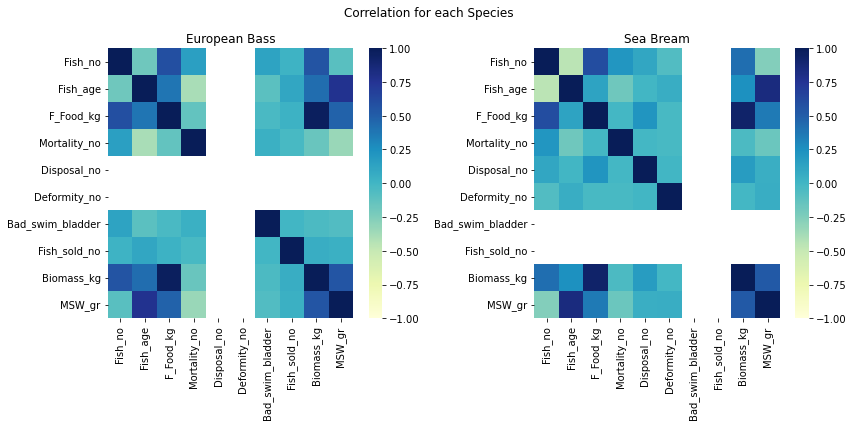

In [13]:
#creating a correlation heatmap using the pearson method to find correlation for MSW_gr
#create subplot, title, color
fig, axes = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Correlation for each Species')
#set heatmap color
color = plt.get_cmap('YlGnBu').copy()
#change to black color for bad values
color.set_bad('white')
#for european bass
corlp_1 = european_bass[european_bass['MSW_gr']!=0].corr()
axes[0].set_title('European Bass')
sns.heatmap(corlp_1,vmin=-1, vmax=1, cmap=color, ax=axes[0])

#for sea bream
corlp_2 = sea_bream[sea_bream['MSW_gr']!=0].corr()
axes[1].set_title('Sea Bream')
sns.heatmap(corlp_2, vmin=-1, vmax=1, cmap=color, ax=axes[1])
fig.tight_layout()

The above Correlation Heatmap shows that MSW_gr has a high correlation with Fish_age for both species. As the fish are getting older, they gain more weight. The same observation can be seen in the scatterplot below. In order to fill the missing MSW_gr values for the rest of the population, regression models will be created, for each part number of the two species.

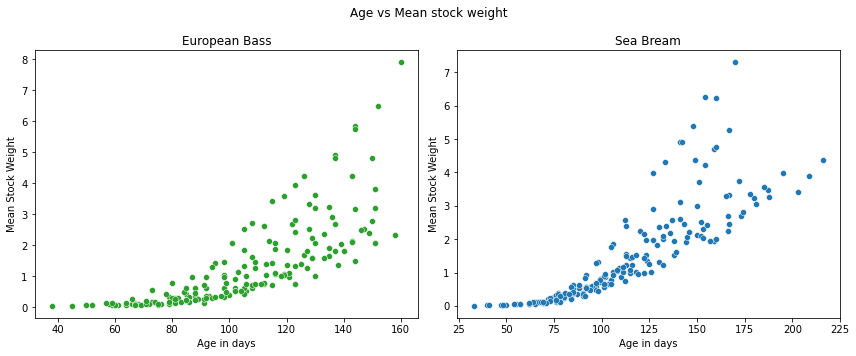

In [14]:
#create scatterplots MSW_gr vs Fish_age for both species
#prepare data for scatterplot
ebage=european_bass[european_bass['MSW_gr']!=0]['Fish_age']
ebmsw=european_bass[european_bass['MSW_gr']!=0]['MSW_gr']
sbage=sea_bream[sea_bream['MSW_gr']!=0]['Fish_age']
sbmsw=sea_bream[sea_bream['MSW_gr']!=0]['MSW_gr']
#create subplots, title, color
fig, axes = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Age vs Mean stock weight')
#scatterplot
#for european bass
axes[0].set_title('European Bass')
sns.scatterplot(x=ebage, y=ebmsw, color='tab:green', ax=axes[0])
#for sea bream
axes[1].set_title('Sea Bream')
sns.scatterplot(x=sbage, y=sbmsw, color='tab:blue', ax=axes[1])
#set labels
axes[0].set_xlabel('Age in days')
axes[1].set_xlabel('Age in days')
axes[0].set_ylabel('Mean Stock Weight')
axes[1].set_ylabel('Mean Stock Weight')
fig.tight_layout()

#### Identifying outliers

The scatterplot above revealed some outliers. The boxplots below provide better insight on which outliers should be dropped, by applying log to MSW_gr. 

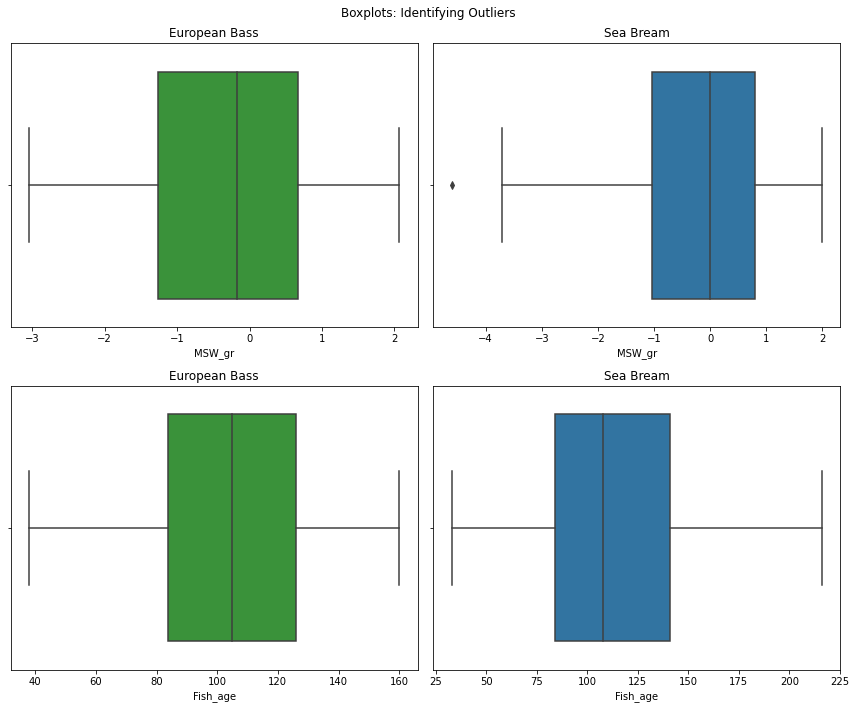

In [15]:
#create subplots, title, color
fig, axes = plt.subplots(2, 2, figsize=(12,10))
fig.suptitle('Boxplots: Identifying Outliers')
#boxplots
#MSW
#for european bass
axes[0,0].set_title('European Bass')
sns.boxplot(x=np.log(ebmsw), color='tab:green', ax=axes[0,0])
#for sea bream
axes[0,1].set_title('Sea Bream')
sns.boxplot(x=np.log(sbmsw), color='tab:blue', ax=axes[0,1])
#AGE
#for european bass
axes[1,0].set_title('European Bass')
sns.boxplot(x=ebage, color='tab:green', ax=axes[1,0])
#for sea bream
axes[1,1].set_title('Sea Bream')
sns.boxplot(x=sbage, color='tab:blue', ax=axes[1,1])
fig.tight_layout()

####  Dealing with outliers

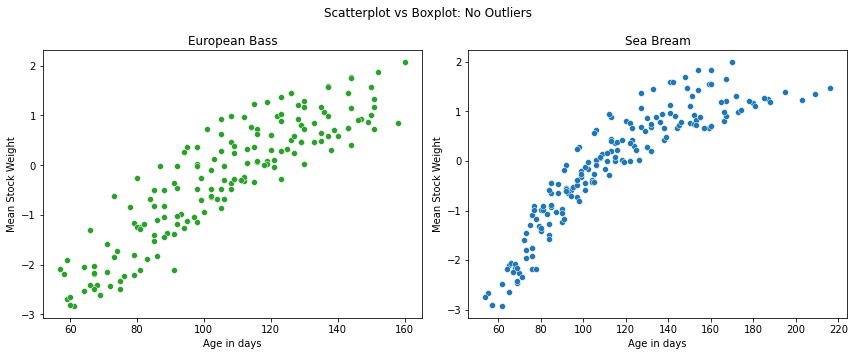

In [16]:
#for european bass, replace outliers with 0 to replace later
european_bass.loc[ebmsw[ebmsw > 9].index,'MSW_gr']=0
european_bass.loc[ebage[ebage < 55].index,'MSW_gr']=0
ebage=european_bass[european_bass['MSW_gr']!=0]['Fish_age']
ebmsw=european_bass[european_bass['MSW_gr']!=0]['MSW_gr']

#for sea bream, replace outliers with 0 to replace later

sea_bream.loc[sbmsw[np.log(sbmsw)<=-3].index,'MSW_gr']=0
sbage=sea_bream[sea_bream['MSW_gr']!=0]['Fish_age']
sbmsw=sea_bream[sea_bream['MSW_gr']!=0]['MSW_gr']

#show plots again without outliers
#create subplots, title, color
fig, axes = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Scatterplot vs Boxplot: No Outliers')
#scatterplot
#for european bass
axes[0].set_title('European Bass')
sns.scatterplot(x=ebage, y=np.log(ebmsw), color='tab:green', ax=axes[0])
#for sea bream
axes[1].set_title('Sea Bream')
sns.scatterplot(x=sbage, y=np.log(sbmsw), color='tab:blue', ax=axes[1])
#set labels
axes[0].set_xlabel('Age in days')
axes[1].set_xlabel('Age in days')
axes[0].set_ylabel('Mean Stock Weight')
axes[1].set_ylabel('Mean Stock Weight')
fig.tight_layout()

#### Histograms to identify distributions

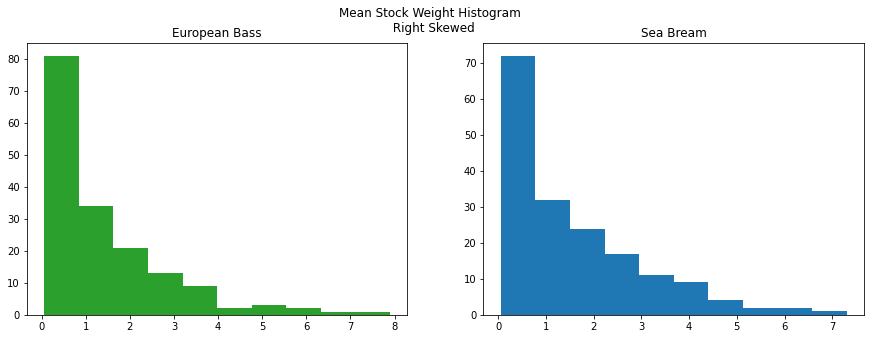

In [17]:
#create subplot to show side by side
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Mean Stock Weight Histogram \n Right Skewed')
ax1.hist(ebmsw, color='tab:green')
ax2.hist(sbmsw, color='tab:blue')
#set titles
ax1.title.set_text('European Bass')
ax2.title.set_text('Sea Bream')
#show plots
plt.show()

The above scatterplots and histograms reveal that Mean Stock Weight follows an exponential function, having a right skew.

#### Q-Q Plot to verify exponential function

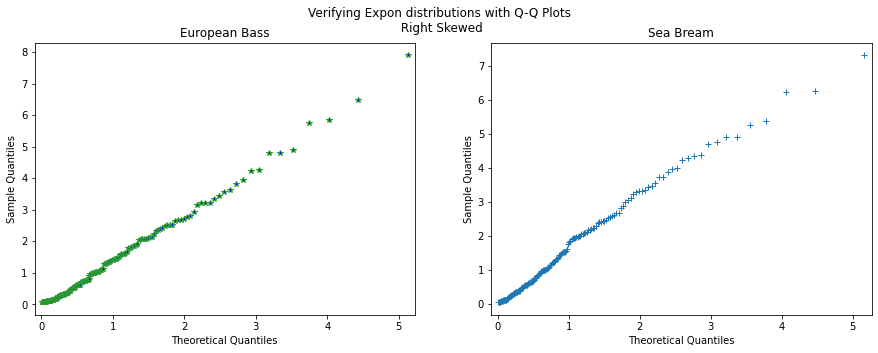

In [18]:
import warnings
#ignore Q-Q Plot warning for older versions
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    #create subplot to show side by side
    #histograms with line passing 
    fig, axes = plt.subplots(1, 2,figsize=(15,5))
    fig.suptitle('Verifying Expon distributions with Q-Q Plots\n Right Skewed')
    sm.qqplot(ebmsw, stats.expon, ax=axes[0], marker='*', color='tab:green')
    sm.qqplot(sbmsw, stats.expon, ax=axes[1], marker='+', color='tab:blue')
    #set titles
    axes[0].title.set_text('European Bass')
    axes[1].title.set_text('Sea Bream')
    #show plots
    plt.show()

#### Create, train model, and fill missing values

Linear regression will be used to fill the missing values for each species and each part number. Since the data follow an exponentially distribution, log() will be applied to MSW_gr in order to transform it to simple linear distribution.

#### Define Linear Model

In [19]:
#inspired by Jason Brownlee, https://bit.ly/3n7cRCq
#create a function that takes age and msw, and returns a, b and score
#using repeated K-fold cross validation
def lmodel_fit(age, msw):
    #prepare data, reshape and use log of msw
    X = age.reshape(-1,1)
    y = np.log(msw).reshape(-1,1)
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=4, n_repeats=5, random_state=1)
    # create model
    model = LinearRegression()
    # evaluate model
    cv_results = cross_validate(model, X, y, scoring='neg_mean_squared_error', cv=cv, return_estimator=True)
    # get index of best score and coef-intercept
    idx = np.argmax(cv_results['test_score'])
    a = cv_results['estimator'][idx].coef_.item()
    b = cv_results['estimator'][idx].intercept_.item()
    score = cv_results['test_score'][idx].item()
    #return the results
    return a, b, -score

#### Calculate MSW estimation for European Bass

In [20]:
#iterate through every unique part number
for part in european_bass["Part Number"].unique():
    ebage=european_bass[(european_bass['MSW_gr']!=0) & (european_bass["Part Number"]==part)]['Fish_age']
    ebmsw=european_bass[(european_bass['MSW_gr']!=0) & (european_bass["Part Number"]==part)]['MSW_gr']
    #first convert to numpy array
    #european bass
    ebmsw=ebmsw.to_numpy()
    ebage=ebage.to_numpy()
    #get parameters of European Bass function
    eb_a, eb_b, eb_score = lmodel_fit(ebage,ebmsw)
    #first get index of zero values for european_bass
    eb_idx=european_bass[(european_bass['MSW_gr']==0)&(european_bass['Part Number']==part)].index
    #store age using index
    eb_age=european_bass.loc[eb_idx,'Fish_age']
    #calculate estimated msw
    e_ebmsw=np.exp(eb_a*eb_age+eb_b)
    #fill the database
    european_bass.loc[eb_idx,'MSW_gr'] = e_ebmsw

#### Calculate MSW estimation for Sea Bream

In [21]:
#iterate through every unique part number
for part in sea_bream["Part Number"].unique():
    sbage=sea_bream[(sea_bream['MSW_gr']!=0) & (sea_bream['Part Number']==part)]['Fish_age']
    sbmsw=sea_bream[(sea_bream['MSW_gr']!=0) & (sea_bream['Part Number']==part)]['MSW_gr']
    #first convert to numpy array
    #sea bream
    sbmsw=sbmsw.to_numpy()
    sbage=sbage.to_numpy()
    #get parameters of Sea Bream function
    sb_a, sb_b, sb_score = lmodel_fit(sbage,sbmsw)
    #first get index of zero values for sea_bream
    sb_idx=sea_bream[(sea_bream['MSW_gr']==0) & (sea_bream['Part Number']==part)].index
    #store age using index
    sb_age=sea_bream.loc[sb_idx,'Fish_age']
    #calculate estimated msw
    e_sbmsw=np.exp(sb_a*sb_age+sb_b)
    #fill the data
    sea_bream.loc[sb_idx,'MSW_gr'] = e_sbmsw

#### Show a sample plot

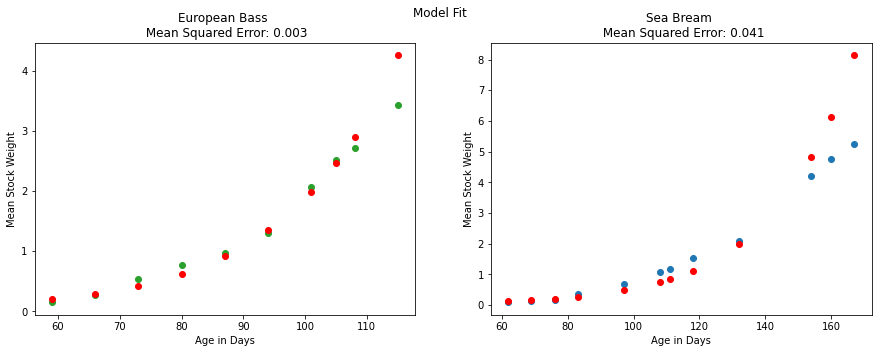

In [22]:
#create y for both species 
eb_y=np.exp(eb_a*ebage+eb_b)
sb_y=np.exp(sb_a*sbage+sb_b)
#create subplot to show side by side
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Model Fit')
ax1.scatter(ebage,ebmsw, color='tab:green')
ax1.scatter(ebage,eb_y, color='r')
ax2.scatter(sbage,sbmsw, color='tab:blue')
ax2.scatter(sbage,sb_y, color='r')
#set titles
ax1.title.set_text('European Bass \n Mean Squared Error: '+ str(np.round(eb_score,3)))
ax2.title.set_text('Sea Bream \n Mean Squared Error: '+ str(np.round(sb_score,3)))
#set labels
ax1.set_xlabel('Age in Days')
ax2.set_xlabel('Age in Days')
ax1.set_ylabel('Mean Stock Weight')
ax2.set_ylabel('Mean Stock Weight')
#show plot
plt.show()

### Working towards answering the questions

#### Create tables with statistics for each species

In [23]:
#Create new tables with stats for each species
#European Bass
ebdata = european_bass.groupby(
    ['Part Number','Species'], as_index=False).agg(Max_fish_no=('Fish_no', 'max'), Max_fish_age=('Fish_age', 'max'),
                                                          Sum_food_kg=('F_Food_kg','sum'),Sum_mortality_no=('Mortality_no','sum'),                                                        
                                                          Sum_bad_bladder=('Bad_swim_bladder','sum'),Sum_fish_sold_no=('Fish_sold_no','sum'),
                                                          Min_MSW_gr=('MSW_gr','min'),Max_MSW_gr=('MSW_gr','max'))
eb_stats = pd.DataFrame(data=ebdata)
#Sea Bream
sbdata = sea_bream.groupby(
    ['Part Number','Species'], as_index=False).agg(Max_fish_no=('Fish_no', 'max'), Max_fish_age=('Fish_age', 'max'),
                                                          Sum_food_kg=('F_Food_kg','sum'),Sum_mortality_no=('Mortality_no','sum'),                                                          
                                                          Sum_bad_bladder=('Bad_swim_bladder','sum'),Sum_fish_sold_no=('Fish_sold_no','sum'),
                                                          Min_MSW_gr=('MSW_gr','min'),Max_MSW_gr=('MSW_gr','max'))
sb_stats = pd.DataFrame(data=sbdata)

#### 1) Which of the two fish species is better in regard to:
#### a) Survival rate, b) Production time, c) Feed conversion ratio (FCR)

#### Finding survival rate

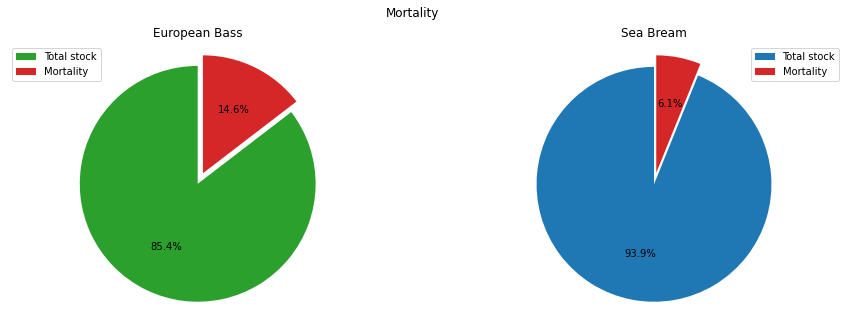

In [24]:
#pie chart to show percentages of Mortality compared to total stock
#prepare data for both species
eb_sizes=[eb_stats['Max_fish_no'].sum()+eb_stats['Sum_bad_bladder'].sum(),eb_stats['Sum_mortality_no'].sum()]
sb_sizes=[sb_stats['Max_fish_no'].sum()+sb_stats['Sum_bad_bladder'].sum(),sb_stats['Sum_mortality_no'].sum()]
labels='Total stock','Mortality'
explode=(0,0.1)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Mortality')
#european bass
patches, texts, _= ax1.pie(eb_sizes, explode=explode,colors=['tab:green','tab:red'], autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('European Bass')
ax1.legend(patches, labels, loc="best")
#sea bream
patches, texts, _= ax2.pie(sb_sizes, explode=explode, colors=['tab:blue','tab:red'],autopct='%1.1f%%',
        shadow=False, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Sea Bream')
ax2.legend(patches, labels, loc="best")
#show piecharts
plt.show()

#### a) Which of the two fish species is better in regard to survival rate?

According to the above pie chart, Sea Bream is better in regard to how much stock it is left at the end of the pre-fattening production stage. More specifically, only 6.1% of the total Sea Bream population died during production, compared to 14.6% of European Bass population.

#### Finding production time
In order to find which species has the better production time, a common Mean stock weight target must be set. The target is going to be around 2.1 grams, since it represents more than 80% of the data, according to the pie chart below.

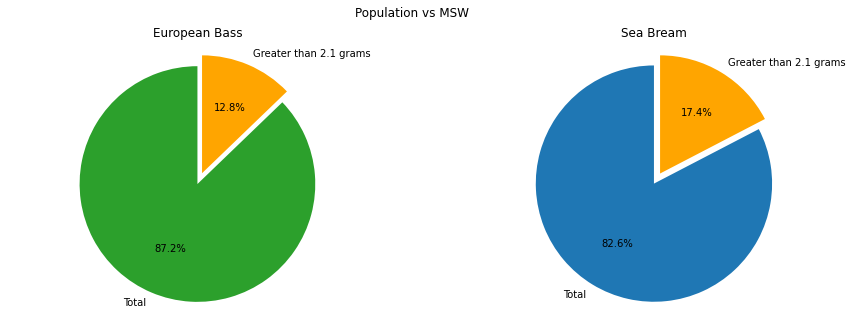

In [25]:
#pie chart
#prepare data for both species
eb_sizes=[european_bass['MSW_gr'].count(),european_bass[european_bass['MSW_gr']>2.1]['MSW_gr'].count()]
sb_sizes=[sea_bream['MSW_gr'].count(),sea_bream[sea_bream['MSW_gr']>2.1]['MSW_gr'].count()]
labels='Total','Greater than 2.1 grams'
explode=(0,0.1)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Population vs MSW')

#european bass
ax1.pie(eb_sizes, explode=explode, labels=labels, colors=['tab:green','orange'], autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('European Bass')

#sea bream
ax2.pie(sb_sizes, explode=explode, labels=labels, colors=['tab:blue','orange'],autopct='%1.1f%%',
        shadow=False, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Sea Bream')

#show piecharts
plt.show()
#drop the rows with MSW_gr > 2.1
#european bass
didx=european_bass[european_bass['MSW_gr']>2.1].index
european_bass = european_bass.drop(index=didx)
#sea bream
didx=sea_bream[sea_bream['MSW_gr']>2.1].index
sea_bream = sea_bream.drop(index=didx)

For each part number, the number of days it took to reach around 2.1 gram of weight will be calculated, and then the mean will be used to find the production time.

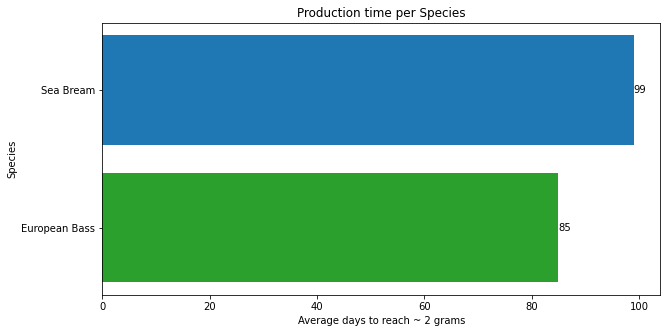

In [26]:
#Create new production tables for each species
#European Bass
ebdata = european_bass.groupby(
    ['Part Number','Species'], as_index=False).agg(Min_fish_age=('Fish_age', 'min'), Max_fish_age=('Fish_age', 'max'),
                                                   Days=('Date','count'), Max_MSW_gr=('MSW_gr','max'))

eb_prod = pd.DataFrame(data=ebdata)
#Sea Bream
sbdata = sea_bream.groupby(
    ['Part Number','Species'], as_index=False).agg(Min_fish_age=('Fish_age', 'min'), Max_fish_age=('Fish_age', 'max'), 
                                                   Days=('Date','count'), Max_MSW_gr=('MSW_gr','max'))

sb_prod = pd.DataFrame(data=sbdata)

#drop the rows with Max_MSW_gr < 1.9
#european bass
didx=eb_prod[eb_prod['Max_MSW_gr']<1.9].index
eb_prod = eb_prod.drop(index=didx)
#sea bream
didx=sb_prod[sb_prod['Max_MSW_gr']<1.9].index
sb_prod = sb_prod.drop(index=didx)

# get average production time
eb_days = round(eb_prod['Days'].mean())
sb_days = round(sb_prod['Days'].mean())

#create horizontal bar plot 
#new figure
fig, ax = plt.subplots(figsize=(10,5))
#create bars with colors
ax.barh(['European Bass','Sea Bream'],[eb_days,sb_days],color=['tab:green','tab:blue'])
# title and axis names
ax.set_title('Production time per Species')
ax.set_xlabel('Average days to reach ~ 2 grams')
ax.set_ylabel('Species')

#auto-label bars
ax.bar_label(ax.containers[0])
#show plot
plt.show()

#### b) Which of the two fish species is better in regard to production time?

According to the above bar chart, it takes on average fourteen less days for European Bass to reach approximately two grams of weight compared to Sea Bream, therefore, European Bass has better production time than Sea Bream.

#### Finding feed conversion ratio (FCR)

The Feed conversion ratio (FCR) is:
FCR = Total feed consumed / Total weight of product produced,

where:
Total weight of product produced = final weight of the product – starting weight of the product

In [27]:
#calculate new stats containing fish with less than or equal to 2.1 grams 
#European Bass
ebdata = european_bass.groupby(
    ['Part Number','Species'], as_index=False).agg(Sum_food_kg=('F_Food_kg','sum'),Min_MSW_gr=('MSW_gr','min'),Max_MSW_gr=('MSW_gr','max'))

eb_fcr = pd.DataFrame(data=ebdata)
#Sea Bream
sbdata = sea_bream.groupby(
    ['Part Number','Species'], as_index=False).agg(Sum_food_kg=('F_Food_kg','sum'),Min_MSW_gr=('MSW_gr','min'),Max_MSW_gr=('MSW_gr','max'))

sb_fcr = pd.DataFrame(data=sbdata)

#drop the rows with Max_MSW_gr < 1.9
#european bass
didx=eb_fcr[eb_fcr['Max_MSW_gr']<1.9].index
eb_fcr = eb_fcr.drop(index=didx)
#sea bream
didx=sb_fcr[sb_fcr['Max_MSW_gr']<1.9].index
sb_fcr = sb_fcr.drop(index=didx)

#create new variables with the final fcr
#calculate the average FCR of each of the two species and take log() to normalise the numbers
eb_fcrf=np.log((eb_fcr['Sum_food_kg']/((eb_fcr['Max_MSW_gr'] - eb_fcr['Min_MSW_gr'])/1000)).mean())
sb_fcrf=np.log((sb_fcr['Sum_food_kg']/((sb_fcr['Max_MSW_gr'] - sb_fcr['Min_MSW_gr'])/1000)).mean())

#create new dataset
FCR = pd.DataFrame(np.array([['European Bass', eb_fcrf.round(2)], ['Sea Bream', sb_fcrf.round(2)]]),
                   columns=['Species', 'Feed Conversion Ratio'])
#show results
FCR

,Species,Feed Conversion Ratio
0,European Bass,13.84
1,Sea Bream,14.47


#### c) Which of the two fish species is better in regard to feed conversion ratio (FCR)?
The two fish species have very similar Feed Conversion Ratio numbers, more specifically European Bass's Feed Conversion Ratio is 13.84, while Sea Bream's Feed Conversion Ratio is 14.47. Although a clear winner cannot be declared, European Bass has a smaller, therefore better Feed Conversion Ratio than Sea Bream.

#### 2) Which year was better in regard to: a) Quality of eggs, b) Sales
The year that had the lowest percentage of mortality and bad swim bladder will be considered the year with the better quality of eggs. Percentage of fish sold per year will be calculated to answer the second part of the question. 

These questions will be answered using the Part Numbers of the stocks. Every Part Number cointains the year the eggs hatch and the production starts. This information is found by isolating the fifth and sixth string. A new columns is created with this new information.

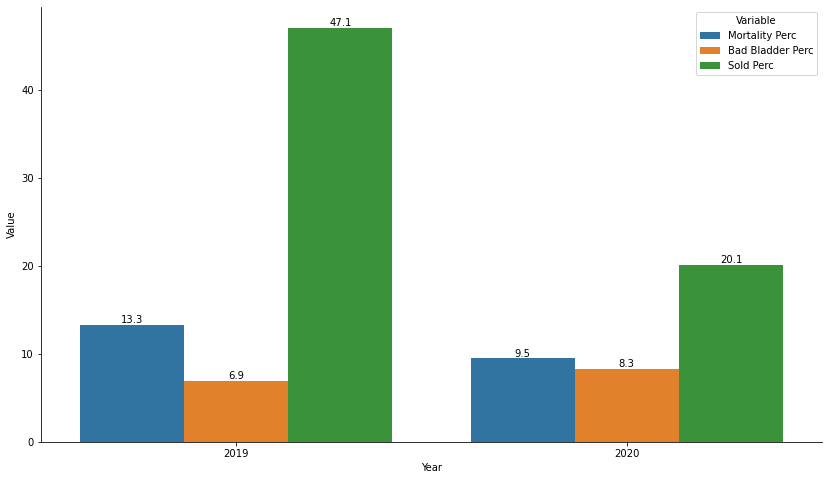

In [28]:
#create new column Egg Year for both species
eb_stats['Egg Year'] = eb_stats['Part Number'].str[4:6]
sb_stats['Egg Year'] = sb_stats['Part Number'].str[4:6]
#join both species together
fish_stats=pd.concat([eb_stats,sb_stats],ignore_index=True)
#store indexes of both years
idx19=fish_stats['Egg Year']=='19'
idx20=fish_stats['Egg Year']=='20'
#For Year 2019
#total fish_no
tfn19=fish_stats.loc[idx19,'Max_fish_no'].sum()
#total mortality_no
tmn19=fish_stats.loc[idx19,'Sum_mortality_no'].sum()
#total bad_bladder
tbb19=fish_stats.loc[idx19,'Sum_bad_bladder'].sum()
#total fish_sold_no
tfsn19=fish_stats.loc[idx19,'Sum_fish_sold_no'].sum()

#For Year 2020
#total fish_no
tfn20=fish_stats.loc[idx20,'Max_fish_no'].sum()
#total mortality_no
tmn20=fish_stats.loc[idx20,'Sum_mortality_no'].sum()
#total bad_bladder
tbb20=fish_stats.loc[idx20,'Sum_bad_bladder'].sum()
#total fish_sold_no
tfsn20=fish_stats.loc[idx20,'Sum_fish_sold_no'].sum()

#create new dataset
egg_quality = pd.DataFrame(np.array([[2019, tfn19, tmn19,tbb19,tfsn19], [2020, tfn20, tmn20,tbb20,tfsn20]]),
                   columns=['Year', 'Total Fish', 'Total Mortality','Total Bad Bladder','Total Sold'])
#create percentages columns
egg_quality['Mortality Perc'] = (100*egg_quality['Total Mortality'] / egg_quality['Total Fish']).round(1)
egg_quality['Bad Bladder Perc'] = (100*egg_quality['Total Bad Bladder'] / egg_quality['Total Fish']).round(1)
egg_quality['Sold Perc'] = (100*egg_quality['Total Sold'] / egg_quality['Total Fish']).round(1)

#plot three percentages for both years using seaborn and tidy, provided by https://redirect.is/k3069k9
fig, ax1 = plt.subplots(figsize=(14, 8))

tidy = egg_quality.loc[:,["Year","Mortality Perc","Bad Bladder Perc","Sold Perc"]].melt(id_vars='Year').rename(columns=str.title)
sns.barplot(x='Year', y='Value', hue='Variable', data=tidy, ax=ax1)
#set bar labels for mortality,bbladder and sold
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax1.bar_label(ax1.containers[2])
#Remove the top and right spines from plot
sns.despine(fig)

#### a) Quality of eggs
The year 2019 had 1.4% less fish suffering from bad swim bladder, though the mortality was 3.8% higher than the year 2020. Although the differences are not significant, the year 2020 had the better figures, therefore the better quality of eggs.

#### b) Sales
The year 2020 had significantly less sales compared to the year 2019. There is a high possibility that the reason behind the decrease in sales was the Covid-19 pandemic, though there are not enough data to back this claim and find the exact cause of this phenomenon. 